### Import Packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import matplotlib.pyplot as plt

### Import Data

In [2]:
data_radiomic = pd.read_csv("train_radiomics.csv")
test_radiomic = pd.read_csv("test_radiomics.csv")

data_clinic = pd.read_csv("train_clinical_data.csv")
test_clinic = pd.read_csv("test_clinical_data.csv")

data_info = pd.read_csv("train_info.csv")

print(data_radiomic.shape)
print(test_radiomic.shape)

print(data_clinic.shape)
print(test_clinic.shape)

print(data_info.shape)

(302, 54)
(127, 54)
(300, 7)
(125, 7)
(300, 3)


In [3]:
data_radiomic.head()

,Unnamed: 0,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,firstorder.1,firstorder.2,firstorder.3,firstorder.4,firstorder.5,firstorder.6,firstorder.7,firstorder.8,firstorder.9,firstorder.10,firstorder.11,firstorder.12,firstorder.13,textural,textural.1,textural.2,textural.3,textural.4,textural.5,textural.6,textural.7,textural.8,textural.9,textural.10,textural.11,textural.12,textural.13,textural.14,textural.15,textural.16,textural.17,textural.18,textural.19,textural.20,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30
0,NaN,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_StandardDeviation,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_DifferenceAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_Id,original_glcm_Idm,original_glcm_Imc1,original_glcm_Imc2,original_glcm_Idmn,original_glcm_Idn,original_glcm_InverseVariance,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glrlm_ShortRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
1,PatientID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,5.138062382118321,1.592466352650529,241.0,-310.85803093096126,288.3111051364939,-266.0,-1006.0,1247.0,446.40731943466136,-0.28171362715369264,320.385360855588,0.037008423161283735,102646.77945056533,1056.8435055137238,546253.4997623835,-5334.563631480078,555.8184549870228,54.33681602410259,0.8211014877081448,3.8453834028138583,5.036775448515044,0.005919558920335507,9.270194161558065,0.33867187217563377,0.2627800905967253,-0.17518491008145037,0.9015247439549889,0.9810530030051026,0.917508997533415,0.24941641472261214,0.03776846445132,61.03566173896069,6.007130447529095,0.92639139491901,1.4579804820599591,555.3785937091678,14592.30372702833,0.8913295337029291,0.003561530161295479,954.7491354587909,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885
3,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,4.461053722332744,3.3710133242706672,262.0,-134.4298091178651,191.39515446804003,-15.0,-945.0,1207.0,268.9659999635592,-1.2160624349751639,232.96209038582157,0.08006130804274754,54271.3355569317,1219.6891076375578,331155.23039603705,-6857.579703567763,295.032309126843,16.86878061074089,0.8911837989502003,2.9840342694043587,2.570016664609916,0.02553211184702079,7.551167524390386,0.49571931312929346,0.43987865336946513,-0.2503697644867232,0.932847041118

### Clean Radiomics Data

In [4]:
data_columns = list(['PatientID']) + list(data_radiomic.ix[0,:])[1:]
test_columns = list(['PatientID']) + list(test_radiomic.ix[0,:])[1:]

data_radiomic = pd.DataFrame(np.array(data_radiomic.ix[2:,:]),columns=data_columns)
test_radiomic = pd.DataFrame(np.array(test_radiomic.ix[2:,:]),columns=test_columns)

print(data_radiomic.shape)
print(test_radiomic.shape)

(300, 54)
(125, 54)


In [5]:
data_radiomic.head()

,PatientID,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_StandardDeviation,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_DifferenceAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_Id,original_glcm_Idm,original_glcm_Imc1,original_glcm_Imc2,original_glcm_Idmn,original_glcm_Idn,original_glcm_InverseVariance,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glrlm_ShortRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
0,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,5.138062382118321,1.592466352650529,241.0,-310.85803093096126,288.3111051364939,-266.0,-1006.0,1247.0,446.40731943466136,-0.28171362715369264,320.385360855588,0.037008423161283735,102646.77945056533,1056.8435055137238,546253.4997623835,-5334.563631480078,555.8184549870228,54.33681602410259,0.8211014877081448,3.8453834028138583,5.036775448515044,0.005919558920335507,9.270194161558065,0.33867187217563377,0.2627800905967253,-0.17518491008145037,0.9015247439549889,0.9810530030051026,0.917508997533415,0.24941641472261214,0.03776846445132,61.03566173896069,6.007130447529095,0.92639139491901,1.4579804820599591,555.3785937091678,14592.30372702833,0.8913295337029291,0.003561530161295479,954.7491354587909,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885
1,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,4.461053722332744,3.3710133242706672,262.0,-134.4298091178651,191.39515446804003,-15.0,-945.0,1207.0,268.9659999635592,-1.2160624349751639,232.96209038582157,0.08006130804274754,54271.3355569317,1219.6891076375578,331155.23039603705,-6857.579703567763,295.032309126843,16.86878061074089,0.8911837989502003,2.9840342694043587,2.570016664609916,0.02553211184702079,7.551167524390386,0.49571931312929346,0.43987865336946513,-0.2503697644867232,0.932847041118953,0.9932818146302579,0.9534642579833031,0.3400237904182307,0.11057462137028176,67.82680408866037,5.255594250643582,0.8551540413630085,2.5121246601768097,1766.6193730958223,22881.93268598017,0.7660321748303586,0.002246203831804831,1092.8237238353574,0.0020694221485567173,884.838627165461,0.0036327469226913886,3386.995589481547
2,246,0.02734810613893409,0.26573989535056836,70.43436661176133,1.5554202430337098,0.6429130676926181,10558.818691399667,0.20076598812381322,52655.0,1059535256.0,3.437110589654181,7.585494418008486,115.0,-54.136093438419906,94.1321357821617,2.0,-785.0,900.0,141.85279510151446,-2.153343711307309,131.11635620828895,0.1609050014904606,17191.498865338912,972.4657979251455,54523.086866816026,-1618.3631183474013,78.18396970261281,7.040623243584665,0.8310813154695125,2.3339387067512645,1.496020435703838,0.066

In [6]:
print(data_radiomic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 54 columns):
PatientID                                       300 non-null object
original_shape_Compactness1                     300 non-null object
original_shape_Compactness2                     300 non-null object
original_shape_Maximum3DDiameter                300 non-null object
original_shape_SphericalDisproportion           300 non-null object
original_shape_Sphericity                       300 non-null object
original_shape_SurfaceArea                      300 non-null object
original_shape_SurfaceVolumeRatio               300 non-null object
original_shape_VoxelVolume                      300 non-null object
original_firstorder_Energy                      300 non-null object
original_firstorder_Entropy                     300 non-null object
original_firstorder_Kurtosis                    300 non-null object
original_firstorder_Maximum                     300 non-null object
original_fi

In [7]:
# Converting radiomics data to float data type
# No column has nulls in radiomics data

data_radiomic = pd.concat([data_radiomic.ix[:,0].astype(int), data_radiomic.ix[:,1:].astype(np.float64)],axis=1)
test_radiomic = pd.concat([test_radiomic.ix[:,0].astype(int), test_radiomic.ix[:,1:].astype(np.float64)],axis=1)

In [8]:
data_radiomic.describe()

,PatientID,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_StandardDeviation,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_DifferenceAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_Id,original_glcm_Idm,original_glcm_Imc1,original_glcm_Imc2,original_glcm_Idmn,original_glcm_Idn,original_glcm_InverseVariance,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glrlm_ShortRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,213.740000,0.026078,0.255309,63.735090,1.666887,0.618682,10269.274116,0.332531,55941.000000,2.725407e+09,4.232072,8.890333,400.466667,-162.813816,167.128062,-113.733333,-921.730000,1322.196667,282.148891,-1.455251,209.789808,0.104487,50747.795018,1132.074310,3.196540e+05,-3534.372971,264.998361,30.594646,0.800481,3.001776,3.208817,0.037707,7.334689,0.479932,0.423750,-0.224732,0.889318,0.988846,0.945115,0.313875,0.102365,64.303560,5.019410,0.846900,2.997984,4028.912972,21708.293730,0.770259,0.004949,1053.341229,0.004411,842.425719,0.009939,3956.614366
std,122.737119,0.006213,0.114462,35.533323,0.321580,0.101082,11020.943961,0.165777,82370.656898,5.094067e+09,0.895564,13.519950,398.870750,161.026270,83.895591,192.090246,102.347678,432.268618,153.524367,1.551742,82.210462,0.078533,36012.130280,376.497864,3.318146e+05,5057.830899,197.650840,31.973293,0.100714,0.808598,1.999398,0.042956,1.767280,0.151545,0.175137,0.064756,0.062526,0.010519,0.032398,0.082071,0.088305,12.616793,0.942364,0.093955,2.277218,7354.203503,30741.811717,0.139863,0.008117,367.251140,0.006535,257.999681,0.025015,3721.271813
min,2.000000,0.009288,0.030648,13.453624,1.154634,0.312946,409.699505,0.092706,640.000000,2.388461e+07,2.178197,1.385668,-71.000000,-665.552148,26.784907,-776.000000,-1159.000000,656.000000,53.646685,-8.176859,49.522001,0.023359,2452.428625,271.723565,2.271162e+03,-28739.715459,10.944156,1.180982,0.382125,1.250895,0.506852,0.001209,3.616187,0.229641,0.142743,-0.445933,0.517424,0.946453,0.853036,0.150059,0.003717,29.568848,2.787347,0.568045,1.129743,20.662759,503.361305,0.420690,0.000636,259.345076,0.000401,245.062735,0.001749,325.511805
25%,106.750000,0.022028,0.172413,33.915016,1.443163,0.556575,2187.199167,0.200968,5586.750000,5.434917e+08,3.539630,2.150392,143.00000

### Clean Clinic Data

In [9]:
print(data_clinic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
PatientID        300 non-null int64
Histology        280 non-null object
Mstage           300 non-null int64
Nstage           300 non-null int64
SourceDataset    300 non-null object
Tstage           300 non-null int64
age              284 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB
None


In [10]:
print(data_clinic.shape)
data_clinic.head()

(300, 7)


,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,Adenocarcinoma,0,0,l2,2,66.0000
1,371,large cell,0,2,l1,4,64.5722
2,246,squamous cell carcinoma,0,3,l1,2,66.0452
3,240,nos,0,2,l1,3,59.3566
4,284,squamous cell carcinoma,0,3,l1,4,71.0554


#### Convert 'Histology' Column To Lower Case

In [11]:
# Duplicates in values due to inconsistency in lower case and upper case
data_clinic.Histology.value_counts()

Adenocarcinoma                         80
large cell                             61
squamous cell carcinoma                59
nos                                    38
adenocarcinoma                         21
Squamous cell carcinoma                19
NSCLC NOS (not otherwise specified)     2
Name: Histology, dtype: int64

In [12]:
data_clinic['Histology'] = data_clinic['Histology'].str.lower()
data_clinic.Histology.value_counts()

adenocarcinoma                         101
squamous cell carcinoma                 78
large cell                              61
nos                                     38
nsclc nos (not otherwise specified)      2
Name: Histology, dtype: int64

#### Change 'nsclc nos' To 'nos' in 'Histology' Column

In [13]:
# On data
data_clinic.at[data_clinic['Histology'] == 'nsclc nos (not otherwise specified)',['Histology']] = 'nos'
data_clinic.Histology.value_counts()

adenocarcinoma             101
squamous cell carcinoma     78
large cell                  61
nos                         40
Name: Histology, dtype: int64

In [14]:
# Perform the same steps on test 
print(test_clinic.Histology.value_counts())
test_clinic['Histology'] = test_clinic['Histology'].str.lower()
print(test_clinic.Histology.value_counts())
test_clinic.at[test_clinic['Histology'] == 'nsclc nos (not otherwise specified)',['Histology']] = 'nos'
test_clinic.Histology.value_counts()

large cell                             32
Adenocarcinoma                         31
squamous cell carcinoma                23
nos                                    13
Squamous cell carcinoma                 8
adenocarcinoma                          5
NSCLC NOS (not otherwise specified)     1
Name: Histology, dtype: int64
adenocarcinoma                         36
large cell                             32
squamous cell carcinoma                31
nos                                    13
nsclc nos (not otherwise specified)     1
Name: Histology, dtype: int64


adenocarcinoma             36
large cell                 32
squamous cell carcinoma    31
nos                        14
Name: Histology, dtype: int64

#### Impute The Nulls In 'Histology' Column

In [15]:
# Impute the nulls in Histology with 'adenocarcinoma'. Keep a note that its safest in Histology
print(data_clinic.info())
data_clinic.at[data_clinic['Histology'].isnull(),['Histology']] = 'adenocarcinoma'
print(data_clinic.info())
data_clinic.Histology.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
PatientID        300 non-null int64
Histology        280 non-null object
Mstage           300 non-null int64
Nstage           300 non-null int64
SourceDataset    300 non-null object
Tstage           300 non-null int64
age              284 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
PatientID        300 non-null int64
Histology        300 non-null object
Mstage           300 non-null int64
Nstage           300 non-null int64
SourceDataset    300 non-null object
Tstage           300 non-null int64
age              284 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB
None


adenocarcinoma             121
squamous cell carcinoma     78
large cell                  61
nos                         40
Name: Histology, dtype: int64

In [16]:
# Repeat imputing for the test clinic data
# Impute the nulls in Histology with 'adenocarcinoma'. Keep a note that its safest in Histology
print(test_clinic.info())
test_clinic.at[test_clinic['Histology'].isnull(),['Histology']] = 'adenocarcinoma'
print(test_clinic.info())
test_clinic.Histology.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
PatientID        125 non-null int64
Histology        113 non-null object
Mstage           125 non-null int64
Nstage           125 non-null int64
SourceDataset    125 non-null object
Tstage           125 non-null int64
age              121 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 7.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
PatientID        125 non-null int64
Histology        125 non-null object
Mstage           125 non-null int64
Nstage           125 non-null int64
SourceDataset    125 non-null object
Tstage           125 non-null int64
age              121 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 7.0+ KB
None


adenocarcinoma             48
large cell                 32
squamous cell carcinoma    31
nos                        14
Name: Histology, dtype: int64

#### Impute Nulls In 'age' Column With Mean Age

        PatientID      Mstage      Nstage      Tstage         age
count  300.000000  300.000000  300.000000  300.000000  284.000000
mean   213.740000    0.040000    0.963333    2.103333   68.766856
std    122.737119    0.314212    1.160378    1.072297    9.587605
min      2.000000    0.000000    0.000000    1.000000   42.513300
25%    106.750000    0.000000    0.000000    1.000000   62.979625
50%    217.000000    0.000000    0.000000    2.000000   69.947300
75%    318.500000    0.000000    2.000000    3.000000   76.201950
max    424.000000    3.000000    3.000000    5.000000   87.126600


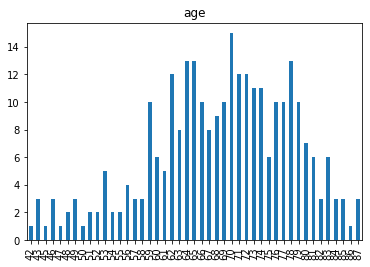

In [17]:
data_clinic[~data_clinic['age'].isnull()]['age'].astype(int).value_counts().sort_index().plot.bar(title='age')
print(data_clinic.describe())

In [18]:
# We observe that mean and median of age column is almost same. Hence we replace the nulls with mean average
data_clinic.at[data_clinic['age'].isnull(),['age']] = data_clinic['age'].mean()
data_clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
PatientID        300 non-null int64
Histology        300 non-null object
Mstage           300 non-null int64
Nstage           300 non-null int64
SourceDataset    300 non-null object
Tstage           300 non-null int64
age              300 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB


In [19]:
# Impute nulls with mean age on test 
print(test_clinic.info())
test_clinic.at[test_clinic['age'].isnull(),['age']] = test_clinic['age'].mean()
test_clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
PatientID        125 non-null int64
Histology        125 non-null object
Mstage           125 non-null int64
Nstage           125 non-null int64
SourceDataset    125 non-null object
Tstage           125 non-null int64
age              121 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 7.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
PatientID        125 non-null int64
Histology        125 non-null object
Mstage           125 non-null int64
Nstage           125 non-null int64
SourceDataset    125 non-null object
Tstage           125 non-null int64
age              125 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 7.0+ KB


### Analyze Clinic Data

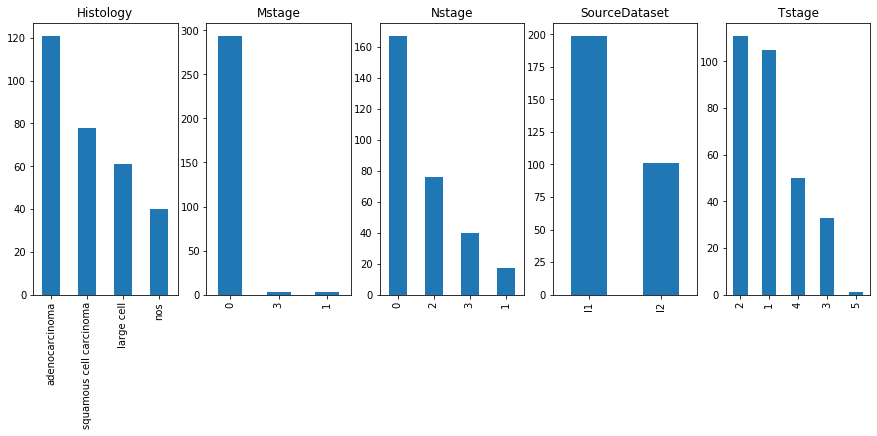

In [20]:
fig, ax = plt.subplots(figsize=(15,5))

for i,column in enumerate(['Histology','Mstage','Nstage','SourceDataset','Tstage']):
    plt.subplot(1,5, i+1)
    data_clinic[column].value_counts().plot.bar(title=column)

In [21]:
# Change the columns data types as per the info
# One hot encode all the 5 columns (should be categorical)
# Club radiomic and clinic data
# Data imputation is not required as there are no Null values in any of the columns
# Use histograms to check if there's skewness in radiomics data (if there is we need to do the transformations)
# Remove features that are highly correlated
# Feature selection - chi-square test/extra tree classifiers
# use PCA/SVD (converts a number of possibly correlated variables into a smaller number of uncorrelated components)
# Feature engineering - create new columns (ratios?)
# Apply XGBoost

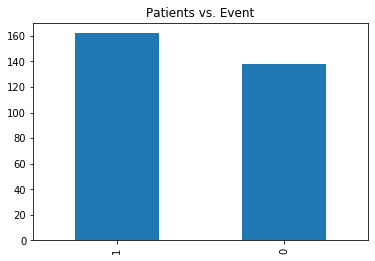

In [22]:
data_info.Event.value_counts().plot.bar(title='Patients vs. Event')
# We can easily see that patients distribution in Censorship was almost evenly distributed

In [23]:
print(data_info.shape)
print(data_info.head())
data_clinic.head()

(300, 3)
   PatientID  SurvivalTime  Event
0        202          1378      0
1        371           379      1
2        246           573      1
3        240           959      0
4        284          2119      0


,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,adenocarcinoma,0,0,l2,2,66.0000
1,371,large cell,0,2,l1,4,64.5722
2,246,squamous cell carcinoma,0,3,l1,2,66.0452
3,240,nos,0,2,l1,3,59.3566
4,284,squamous cell carcinoma,0,3,l1,4,71.0554


Text(0.5, 0, 'time t (in days)')

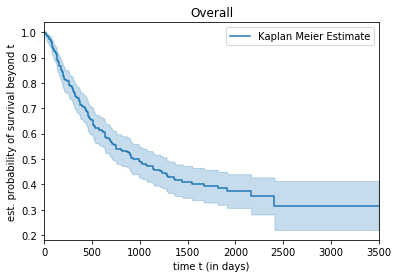

In [24]:
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts

kmf = KaplanMeierFitter() 
kmf.fit(data_info['SurvivalTime'], data_info['Event'], label='Kaplan Meier Estimate')
kmf.plot(ci_show=True)
plt.title('Overall')
plt.ylabel("est. probability of survival beyond t")
plt.xlabel("time t (in days)")

# Within the first 500 days, probability of survival goes down from 100% to 70% (steep slope!)

In [25]:
data_clinic_info = pd.merge(left = data_clinic, right = data_info, left_on = 'PatientID', right_on = 'PatientID')
data_clinic_info.head()

print(data_clinic_info.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 9 columns):
PatientID        300 non-null int64
Histology        300 non-null object
Mstage           300 non-null int64
Nstage           300 non-null int64
SourceDataset    300 non-null object
Tstage           300 non-null int64
age              300 non-null float64
SurvivalTime     300 non-null int64
Event            300 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 23.4+ KB
None


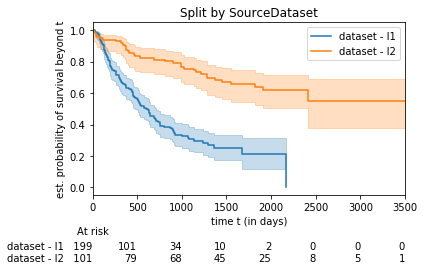

In [26]:
# Probability of survival beyond t is significantly different depending on the dataset

ix = data_clinic_info['SourceDataset'] == 'l1'

ax = plt.subplot(111)

kmf_l1 = KaplanMeierFitter()
ax = kmf_l1.fit(data_clinic_info.loc[ix]['SurvivalTime'], 
                data_clinic_info.loc[ix]['Event'], label='dataset - l1').plot(ax=ax)

kmf_l2 = KaplanMeierFitter()
ax = kmf_l2.fit(data_clinic_info.loc[~ix]['SurvivalTime'], 
                data_clinic_info.loc[~ix]['Event'], label='dataset - l2').plot(ax=ax)

plt.title('Split by SourceDataset')
plt.ylabel("est. probability of survival beyond t")
plt.xlabel("time t (in days)")
add_at_risk_counts(kmf_l1, kmf_l2, ax=ax)

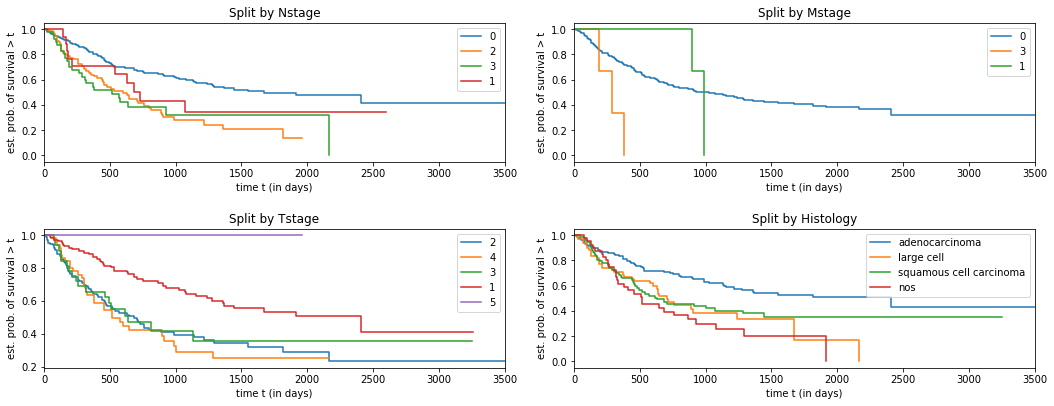

In [27]:
# Probability of survival beyond t Vs. Mstage, Nstage, Tstage, Histology

kmfs = []

fig, ax = plt.subplots(figsize=(15,6))

for i,col in enumerate(['Nstage','Mstage','Tstage','Histology']):
    ax = plt.subplot(2,2,i+1)
    
    for j,col_val in enumerate(data_clinic_info[col].unique()):
        kmfs.append(KaplanMeierFitter())
        ax = kmfs[j].fit(data_clinic_info.loc[data_clinic_info[col] == col_val]['SurvivalTime'], 
                         data_clinic_info.loc[data_clinic_info[col] == col_val]['Event'],
                         label=col_val).plot(ax=ax, ci_show=False)
    
    plt.title('Split by '+ str(col))
    plt.ylabel("est. prob. of survival > t")
    plt.xlabel("time t (in days)")
    plt.legend(loc="best")
    fig.tight_layout(pad=2.0)
# Nstage 0 is better
# Tstage 1 is better
# Mstage 0 is better
# Histology Adenocarcinoma and nos are better

## Cox's Proportional Hazard's Model

In [28]:
# But, we want to consider more than 1 variable. But, this approach becomes infeasible because of smaller subgroups. 
# Instead, we use linear model, Cox's proportional hazard's model, to estimate impact of each variable on survival.
# https://nbviewer.jupyter.org/github/sebp/scikit-survival/blob/master/examples/00-introduction.ipynb

#### Convert ['Histology','Mstage','Nstage','SourceDataset','Tstage'] Columns In Clinic To 'category' Data Type

In [29]:
for dataset in [data_clinic,test_clinic]:
    for column in ['Histology','Mstage','Nstage','SourceDataset','Tstage']:
        dataset[column] = dataset[column].astype('category')
        
print(data_clinic.info())
print(test_clinic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
PatientID        300 non-null int64
Histology        300 non-null category
Mstage           300 non-null category
Nstage           300 non-null category
SourceDataset    300 non-null category
Tstage           300 non-null category
age              300 non-null float64
dtypes: category(5), float64(1), int64(1)
memory usage: 7.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
PatientID        125 non-null int64
Histology        125 non-null category
Mstage           125 non-null category
Nstage           125 non-null category
SourceDataset    125 non-null category
Tstage           125 non-null category
age              125 non-null float64
dtypes: category(5), float64(1), int64(1)
memory usage: 3.5 KB
None


#### Standardize Clinic Data (only age column)

In [30]:
from sklearn.preprocessing import StandardScaler
sc_age = StandardScaler()
data_clinic['age'] = sc_age.fit_transform(np.array(data_clinic['age']).reshape(-1, 1))
test_clinic['age'] = sc_age.fit_transform(np.array(test_clinic['age']).reshape(-1, 1))
data_clinic.head()

,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,adenocarcinoma,0,0,l2,2,-0.297128
1,371,large cell,0,2,l1,4,-0.450457
2,246,squamous cell carcinoma,0,3,l1,2,-0.292274
3,240,nos,0,2,l1,3,-1.010552
4,284,squamous cell carcinoma,0,3,l1,4,0.245763


In [31]:
test_clinic.head()

,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,13,nos,0,0,l1,4,-2.366587
1,155,adenocarcinoma,0,3,l1,1,-0.441360
2,404,large cell,0,2,l1,2,-0.298178
3,407,nos,0,0,l1,2,-0.233262
4,9,adenocarcinoma,0,0,l2,2,-1.796486


#### Standardize Radiomics Data

In [32]:
# Check if all columns names in data and test are equal
print(sum(data_radiomic.columns == test_radiomic.columns))
print(len(test_radiomic.columns))

54
54


In [33]:
radiomics_cols = data_radiomic.columns

PID_data = data_radiomic['PatientID']
PID_test = test_radiomic['PatientID']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_radiomic = pd.DataFrame(sc.fit_transform(data_radiomic.iloc[:,1:]),columns=radiomics_cols[1:])
test_radiomic = pd.DataFrame(sc.transform(test_radiomic.iloc[:,1:]),columns=radiomics_cols[1:])

data_radiomic.insert(0, 'PatientID', PID_data)
test_radiomic.insert(0, 'PatientID', PID_test)

print(data_radiomic.shape)
print(test_radiomic.shape)

(300, 54)
(125, 54)


#### Club Radiomics and Clinic

In [34]:
print(data_clinic.shape)
print(data_radiomic.shape,'\n')
print(data_clinic.columns)
print(data_radiomic.columns[0:3])

(300, 7)
(300, 54) 

Index(['PatientID', 'Histology', 'Mstage', 'Nstage', 'SourceDataset', 'Tstage',
       'age'],
      dtype='object')
Index(['PatientID', 'original_shape_Compactness1',
       'original_shape_Compactness2'],
      dtype='object')


In [35]:
# On Data
data_clinic_radiomic = pd.merge(left = data_clinic, right = data_radiomic, 
                                left_on = 'PatientID', right_on = 'PatientID')
print(data_clinic_radiomic.shape)
data_clinic_radiomic.head()

(300, 60)


,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_StandardDeviation,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_DifferenceAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_Id,original_glcm_Idm,original_glcm_Imc1,original_glcm_Imc2,original_glcm_Idmn,original_glcm_Idn,original_glcm_InverseVariance,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glrlm_ShortRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
0,202,adenocarcinoma,0,0,l2,2,-0.297128,0.279967,0.171372,-0.427801,-0.401574,0.312424,-0.439710,-0.346245,-0.439664,0.239410,1.013333,-0.540687,-0.400463,-0.920915,1.446864,-0.794007,-0.824746,-0.174249,1.071705,0.757535,1.347521,-0.860678,1.443561,-0.200151,0.684051,-0.356516,1.473841,0.743803,0.205088,1.045041,0.915782,-0.741238,1.097019,-0.933688,-0.920646,0.766413,0.195547,-0.742111,-0.853519,-0.786717,-0.732734,-0.259445,1.049882,0.847475,-0.677395,-0.473109,-0.231863,0.867081,-0.171186,-0.268908,-0.157392,0.037123,-0.220072,-0.620421
1,371,large cell,0,2,l1,4,-0.450457,-0.493821,-0.587190,0.337381,0.243189,-0.451910,0.009116,-0.554709,-0.155326,0.078159,0.256112,-0.408917,-0.347727,0.176564,0.289737,0.514853,-0.227742,-0.266939,-0.086012,0.154400,0.282336,-0.311545,0.098007,0.233099,0.034720,-0.658140,0.152208,-0.430009,0.902105,-0.021977,-0.320030,-0.283898,0.122697,0.104350,0.092246,-0.396567,0.697336,0.422387,0.258124,0.319141,0.093124,0.279717,0.251049,0.087997,-0.213713,-0.308133,0.038241,-0.030272,-0.333507,0.107688,-0.358934,0.164666,-0.252541,-0.153327
2,246,squamous cell carcinoma,0,3,l1,2,-0.292274,0.204689,0.091284,0.188850,-0.347201,0.240113,0.026316,-0.796164,-0.039960,-0.327568,-0.889149,-0.096673,-0.716883,0.676034,-0.871534,0.603501,1.338169,-0.978332,-0.915363,-0.450628,-0.958575,0.719603,-0.933362,-0.424638,-0.800368,0.379453,-0.946753,-0.737909,0.304345,-0.827300,-0.858087,0.673039,-0.934142,0.903383,0.901993,-0.390376,-0.070609,0.595083,0.580366,0.806525,0.990921,-0.199148,-0.914539,-0.827686,0.483348,-0.077105,-0.095638,-0.900271,-0.378659,-0.475541,-0.425581,-0.805669,-0.203033,0.074239
3,240,nos,0,2,l1,3,-1.010552,0.118113,0.000854,-0.476864,-0.282723,0.156439,-0.549678,-0.052287,-0.521285,-0.406459,0.134768,-0.341434,-0.317592,0.274378,-0.215568,0.400132,0.702017,-0.459270,-0.376798,0.011242,-0.235893,-0.382784,-0.402883,-0.436206,-0.461624,-0.086060,-0.408972,-0.530636,0.592916,-0.092888,-0.359076,-0.528365,0.114192,-0.147973,-0.183412,0.162404,0.216160,0.444067,0.162574,0.529213,-0.589005,-0.274861,0.109821,0.354200,-0.516252,-0.455608,-0.447370,0.414517,-0.258350,-0.399018,-0.265421,-0.262222,-0.241803,-0.568461
4,284,squamous cell carcinoma,0,3,l1,4,0.245763,-0.384876,-0.489053,-0.280182,0.139337,-0.341289,-0.452020,-0.031968,-0.482822,-0.377176,-0.197268,0.008097,-0.49

In [36]:
# On Test
test_clinic_radiomic = pd.merge(left = test_clinic, right = test_radiomic, 
                                left_on = 'PatientID', right_on = 'PatientID')
print(test_clinic_radiomic.shape)
test_clinic_radiomic.head()

(125, 60)


,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_StandardDeviation,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_DifferenceAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_Id,original_glcm_Idm,original_glcm_Imc1,original_glcm_Imc2,original_glcm_Idmn,original_glcm_Idn,original_glcm_InverseVariance,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glrlm_ShortRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
0,13,nos,0,0,l1,4,-2.366587,0.452504,0.360044,1.216854,-0.520641,0.476651,1.710172,-1.317239,2.409341,-0.141275,-1.295391,0.389095,0.915440,1.118127,-1.459062,0.692149,2.620258,0.224317,-1.261001,0.486286,-1.493060,1.243579,-1.199802,-0.856522,-0.899219,0.690129,-1.148627,-0.872832,0.645717,-1.489873,-1.149475,1.051893,-1.295527,1.373078,1.388636,-1.265547,0.275564,0.985695,1.232503,1.262670,1.035651,-0.610649,-1.219303,-1.713426,1.226722,2.341417,1.403312,-1.455020,-0.426396,-0.668198,-0.508501,-1.119364,-0.096293,0.187727
1,155,adenocarcinoma,0,3,l1,1,-0.441360,0.946349,0.939444,-1.266283,-0.824221,0.935891,-0.876144,2.243785,-0.669194,-0.484314,1.090427,-0.506258,-0.855003,-1.967034,0.444964,-1.904714,-0.687728,-0.626111,1.660708,0.966167,0.392329,-0.963788,0.217266,-1.469070,-0.273146,0.548259,0.307895,0.599805,-0.656237,0.993042,1.204073,-0.830422,1.022870,-1.469332,-1.474353,-0.304001,1.095205,-1.324223,-1.672626,-1.712177,-1.084209,-1.516737,1.105929,1.272686,-0.808292,-0.545309,-0.681403,1.312151,0.826507,-1.375678,0.984667,-1.214359,0.227976,-0.892849
2,404,large cell,0,2,l1,2,-0.298178,-1.625054,-1.438368,1.165523,1.734344,-1.674492,0.203588,-0.104131,-0.196174,-0.405141,-1.084641,0.654678,-0.581275,0.865474,-1.077029,0.692149,-0.951976,-0.310966,-0.997590,-1.276750,-1.007976,0.929041,-0.962478,1.473007,-0.525329,0.132856,-0.912231,-0.711273,0.285296,-0.930180,-0.892112,0.754014,-1.021127,1.018256,1.026469,-0.260794,-0.251026,0.754499,0.865170,0.958164,1.026742,1.376715,-1.024481,-0.884572,0.469073,-0.109386,-0.250917,-0.902468,-0.466203,1.493599,-0.522382,1.315964,-0.276817,0.861445
3,407,nos,0,0,l1,2,-0.233262,0.851114,0.823169,-0.472656,-0.769538,0.848513,-0.563652,-0.304697,-0.504455,-0.462087,-0.718300,0.389375,0.054076,0.816527,-0.901572,0.671291,-0.668155,0.208096,-0.789508,-1.083372,-0.630733,0.430449,-0.716966,1.198580,-0.131964,-0.314834,-0.637142,-0.562880,0.320381,-0.634009,-0.675755,0.051605,-0.612953,0.634648,0.653538,-0.223267,0.019830,0.711079,0.788242,1.233346,0.178021,1.147995,-0.583733,-0.586099,-0.041963,-0.392401,-0.508740,-0.421059,-0.351022,1.308855,-0.384944,1.321783,-0.250449,0.220705
4,9,adenocarcinoma,0,0,l2,2,-1.796486,-1.332325,-1.247471,-0.202770,1.255324,-1.343403,-0.288652,0.262840,-0.449927,1.255220,0.934318,-0.388558,-0.161893,-3.018574,0.323550,-3.161429,-1.00

#### Check If 'PatientID's Are Ordered in All Datasets

In [37]:
# All PatientIDs are ordered
print(sum(data_info.PatientID == data_clinic.PatientID))
print(sum(data_clinic.PatientID == data_radiomic.PatientID),'\n')

print(sum(test_radiomic.PatientID == test_clinic.PatientID))

300
300 

125


#### OneHotEncode Category Columns To Numeric Columns

In [38]:
from sksurv.preprocessing import OneHotEncoder

data_clinic_radiomic.set_index('PatientID',inplace=True)
test_clinic_radiomic.set_index('PatientID',inplace=True)

encoder = OneHotEncoder()

data_x = encoder.fit_transform(data_clinic_radiomic)
test_x = encoder.transform(test_clinic_radiomic)

print(data_x.shape)
print(test_x.shape)

data_x.head()

(300, 67)
(125, 67)


,Histology=large cell,Histology=nos,Histology=squamous cell carcinoma,Mstage=1,Mstage=3,Nstage=1,Nstage=2,Nstage=3,SourceDataset=l2,Tstage=2,Tstage=3,Tstage=4,Tstage=5,age,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_StandardDeviation,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_DifferenceAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_Id,original_glcm_Idm,original_glcm_Imc1,original_glcm_Imc2,original_glcm_Idmn,original_glcm_Idn,original_glcm_InverseVariance,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glrlm_ShortRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.297128,0.279967,0.171372,-0.427801,-0.401574,0.312424,-0.439710,-0.346245,-0.439664,0.239410,1.013333,-0.540687,-0.400463,-0.920915,1.446864,-0.794007,-0.824746,-0.174249,1.071705,0.757535,1.347521,-0.860678,1.443561,-0.200151,0.684051,-0.356516,1.473841,0.743803,0.205088,1.045041,0.915782,-0.741238,1.097019,-0.933688,-0.920646,0.766413,0.195547,-0.742111,-0.853519,-0.786717,-0.732734,-0.259445,1.049882,0.847475,-0.677395,-0.473109,-0.231863,0.867081,-0.171186,-0.268908,-0.157392,0.037123,-0.220072,-0.620421
371,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.450457,-0.493821,-0.587190,0.337381,0.243189,-0.451910,0.009116,-0.554709,-0.155326,0.078159,0.256112,-0.408917,-0.347727,0.176564,0.289737,0.514853,-0.227742,-0.266939,-0.086012,0.154400,0.282336,-0.311545,0.098007,0.233099,0.034720,-0.658140,0.152208,-0.430009,0.902105,-0.021977,-0.320030,-0.283898,0.122697,0.104350,0.092246,-0.396567,0.697336,0.422387,0.258124,0.319141,0.093124,0.279717,0.251049,0.087997,-0.213713,-0.308133,0.038241,-0.030272,-0.333507,0.107688,-0.358934,0.164666,-0.252541,-0.153327
246,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.292274,0.204689,0.091284,0.188850,-0.347201,0.240113,0.026316,-0.796164,-0.039960,-0.327568,-0.889149,-0.096673,-0.716883,0.676034,-0.871534,0.603501,1.338169,-0.978332,-0.915363,-0.450628,-0.958575,0.719603,-0.933362,-0.424638,-0.800368,0.379453,-0.946753,-0.737909,0.304345,-0.827300,-0.858087,0.673039,-0.934142,0.903383,0.901993,-0.390376,-0.070609,0.595083,0.580366,0.806525,0.990921,-0.199148,-0.914539,-0.827686,0.483348,-0.077105,-0.095638,-0.900271,-0.378659,-0.475541,-0.425581,-0.805669,-0.203033,0.074239
240,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.010552,0.118113,0.000854,-0.476864,-0.282723,0.156439,-0.549678,-0.052287,-0.521285,-0.406459,0.134768,-0.341434,-0.317592,0.274378,-0.215568,0.400132,0.702017,-0.459270,-0.376798,0.011242,-0.235893,-0.382784,-0.402883,-0.436206,-0.461624,-0.086060,-0.408972,-0.530636,0.592916,-0.092888,-0.359076,-0.528365,0.114192,-0.147973,-0.183412,0.162404,0.216160,0.444067,0.162574,0.529213

In [39]:
test_x.head()

,Histology=large cell,Histology=nos,Histology=squamous cell carcinoma,Mstage=1,Mstage=3,Nstage=1,Nstage=2,Nstage=3,SourceDataset=l2,Tstage=2,Tstage=3,Tstage=4,Tstage=5,age,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_StandardDeviation,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_DifferenceAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_Id,original_glcm_Idm,original_glcm_Imc1,original_glcm_Imc2,original_glcm_Idmn,original_glcm_Idn,original_glcm_InverseVariance,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glrlm_ShortRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-2.366587,0.452504,0.360044,1.216854,-0.520641,0.476651,1.710172,-1.317239,2.409341,-0.141275,-1.295391,0.389095,0.915440,1.118127,-1.459062,0.692149,2.620258,0.224317,-1.261001,0.486286,-1.493060,1.243579,-1.199802,-0.856522,-0.899219,0.690129,-1.148627,-0.872832,0.645717,-1.489873,-1.149475,1.051893,-1.295527,1.373078,1.388636,-1.265547,0.275564,0.985695,1.232503,1.262670,1.035651,-0.610649,-1.219303,-1.713426,1.226722,2.341417,1.403312,-1.455020,-0.426396,-0.668198,-0.508501,-1.119364,-0.096293,0.187727
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.441360,0.946349,0.939444,-1.266283,-0.824221,0.935891,-0.876144,2.243785,-0.669194,-0.484314,1.090427,-0.506258,-0.855003,-1.967034,0.444964,-1.904714,-0.687728,-0.626111,1.660708,0.966167,0.392329,-0.963788,0.217266,-1.469070,-0.273146,0.548259,0.307895,0.599805,-0.656237,0.993042,1.204073,-0.830422,1.022870,-1.469332,-1.474353,-0.304001,1.095205,-1.324223,-1.672626,-1.712177,-1.084209,-1.516737,1.105929,1.272686,-0.808292,-0.545309,-0.681403,1.312151,0.826507,-1.375678,0.984667,-1.214359,0.227976,-0.892849
404,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.298178,-1.625054,-1.438368,1.165523,1.734344,-1.674492,0.203588,-0.104131,-0.196174,-0.405141,-1.084641,0.654678,-0.581275,0.865474,-1.077029,0.692149,-0.951976,-0.310966,-0.997590,-1.276750,-1.007976,0.929041,-0.962478,1.473007,-0.525329,0.132856,-0.912231,-0.711273,0.285296,-0.930180,-0.892112,0.754014,-1.021127,1.018256,1.026469,-0.260794,-0.251026,0.754499,0.865170,0.958164,1.026742,1.376715,-1.024481,-0.884572,0.469073,-0.109386,-0.250917,-0.902468,-0.466203,1.493599,-0.522382,1.315964,-0.276817,0.861445
407,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.233262,0.851114,0.823169,-0.472656,-0.769538,0.848513,-0.563652,-0.304697,-0.504455,-0.462087,-0.718300,0.389375,0.054076,0.816527,-0.901572,0.671291,-0.668155,0.208096,-0.789508,-1.083372,-0.630733,0.430449,-0.716966,1.198580,-0.131964,-0.314834,-0.637142,-0.562880,0.320381,-0.634009,-0.675755,0.051605,-0.612953,0.634648,0.653538,-0.223267,0.019830,0.711079,0.788242,1.233346,0.17

#### Create Sturctured Array 'data_y'

In [40]:
df = data_info[['Event','SurvivalTime']]
df['Event'] = df['Event'].astype('bool')  

dt = df.dtypes
print(dt)

data_y = np.array([tuple(x) for x in df.values], dtype=list(zip(dt.index, dt)))
data_y[:5]

Event            bool
SurvivalTime    int64
dtype: object


array([(False, 1378), ( True,  379), ( True,  573), (False,  959),
       (False, 2119)], dtype=[('Event', '?'), ('SurvivalTime', '<i8')])

In [41]:
# Fit Model
from sksurv.linear_model import CoxPHSurvivalAnalysis

input_x = data_x.ix[:,:] # Model training on..
predict_x = test_x.ix[:,:] # Model predicts on..

# fit the model
estimator = CoxPHSurvivalAnalysis()
estimator.fit(input_x, data_y)

# C-Index
print("C-Index on the training data: " + str(estimator.score(input_x, data_y)))

# coefficients, one for each variable, where each value corresponds to the log hazard ratio.

C-Index on the training data: 0.7544758651230468


### Feature Selection

In [42]:
# Take all features whose absolute importance is more than one. So we don't overfit during testing.
all_coeffs = pd.Series(estimator.coef_, index=input_x.columns)
req_coeffs = all_coeffs[all_coeffs.abs().sort_values()>1]
req_coeffs

Mstage=3                                          2.243497
SourceDataset=l2                                 -1.705210
Tstage=5                                        -17.447044
original_shape_Compactness1                     232.754706
original_shape_Compactness2                     -40.502020
original_shape_SphericalDisproportion           -21.503982
original_shape_Sphericity                      -213.052693
original_shape_SurfaceArea                        1.598332
original_firstorder_Entropy                      -4.895684
original_firstorder_Maximum                      64.695633
original_firstorder_Mean                          5.119897
original_firstorder_MeanAbsoluteDeviation         4.086181
original_firstorder_Median                       -1.029879
original_firstorder_Minimum                     -17.679786
original_firstorder_Range                       -70.463708
original_firstorder_RootMeanSquared               2.026295
original_firstorder_StandardDeviation            -1.4229

In [43]:
test_x[req_coeffs.index].head()

,Mstage=3,SourceDataset=l2,Tstage=5,original_shape_Compactness1,original_shape_Compactness2,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_firstorder_Entropy,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_StandardDeviation,original_firstorder_Uniformity,original_glcm_Contrast,original_glcm_DifferenceEntropy,original_glcm_DifferenceAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_InverseVariance,original_glcm_SumAverage,original_glcm_SumEntropy,original_glrlm_ShortRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13,0.0,0.0,0.0,0.452504,0.360044,-0.520641,0.476651,1.710172,-1.295391,0.915440,1.118127,-1.459062,0.692149,2.620258,0.224317,-1.261001,-1.493060,1.243579,-0.872832,-1.489873,-1.149475,1.051893,-1.295527,1.373078,1.388636,0.985695,1.232503,1.262670,-0.610649,-1.219303,-1.713426,1.226722,-1.455020,-0.426396,-0.668198,-0.508501,-1.119364,0.187727
155,0.0,0.0,0.0,0.946349,0.939444,-0.824221,0.935891,-0.876144,1.090427,-0.855003,-1.967034,0.444964,-1.904714,-0.687728,-0.626111,1.660708,0.392329,-0.963788,0.599805,0.993042,1.204073,-0.830422,1.022870,-1.469332,-1.474353,-1.324223,-1.672626,-1.712177,-1.516737,1.105929,1.272686,-0.808292,1.312151,0.826507,-1.375678,0.984667,-1.214359,-0.892849
404,0.0,0.0,0.0,-1.625054,-1.438368,1.734344,-1.674492,0.203588,-1.084641,-0.581275,0.865474,-1.077029,0.692149,-0.951976,-0.310966,-0.997590,-1.007976,0.929041,-0.711273,-0.930180,-0.892112,0.754014,-1.021127,1.018256,1.026469,0.754499,0.865170,0.958164,1.376715,-1.024481,-0.884572,0.469073,-0.902468,-0.466203,1.493599,-0.522382,1.315964,0.861445
407,0.0,0.0,0.0,0.851114,0.823169,-0.769538,0.848513,-0.563652,-0.718300,0.054076,0.816527,-0.901572,0.671291,-0.668155,0.208096,-0.789508,-0.630733,0.430449,-0.562880,-0.634009,-0.675755,0.051605,-0.612953,0.634648,0.653538,0.711079,0.788242,1.233346,1.147995,-0.583733,-0.586099,-0.041963,-0.421059,-0.351022,1.308855,-0.384944,1.321783,0.220705
9,0.0,1.0,0.0,-1.332325,-1.247471,1.255324,-1.343403,-0.288652,0.934318,-0.161893,-3.018574,0.323550,-3.161429,-1.000911,0.087599,2.683592,0.450349,-0.860047,1.325007,1.396793,1.543833,-0.836568,1.405182,-1.437501,-1.420581,-1.030575,-1.255418,-1.629032,-2.537692,1.041688,1.169229,-0.792850,1.230154,1.768742,-1.934154,2.116660,-1.982086,-0.957345


In [44]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

input_x = data_x[req_coeffs.index] # Model training on..
predict_x = test_x[req_coeffs.index] # Model predicts on..

# fit the model
estimator = CoxPHSurvivalAnalysis()
estimator.fit(input_x, data_y)

# C-Index on the training data with only required coefficients
print("C-Index on the training data: " + str(estimator.score(input_x, data_y)))


C-Index on the training data: 0.7329980388435503


### Prediction on Test Data

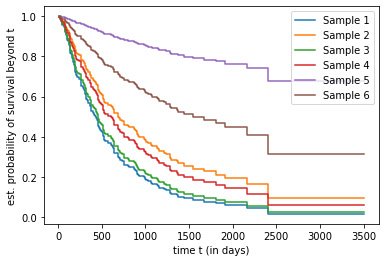

In [46]:
# Predict
pred_surv = estimator.predict_survival_function(predict_x)

# Draw the graph for just first 6 patients
for i, c in enumerate(pred_surv):
    plt.step(c.x, c.y, where="post", label="Sample %d" % (i + 1))
    if i ==5:
        break
plt.ylabel("est. probability of survival beyond t")
plt.xlabel("time t (in days)")
plt.legend(loc="best")
plt.show()

In [47]:
# # Another way to calculate CIndex
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(input_x)
result = concordance_index_censored(data_y['Event'], data_y['SurvivalTime'], prediction)
result

(0.7329980388435503, 23173, 8441, 0, 6)

### Submission

In [48]:
import numpy as np

In [49]:
pred_surv = estimator.predict_survival_function(predict_x)
print(len(pred_surv))

125


In [50]:
pred_data_surv_time =[]
for i in range(len(pred_surv)):
    pred_data_surv_time.append(np.max(pred_surv[i].x *pred_surv[i].y))
print(len(pred_data_surv_time))

np.isnan(pred_data_surv_time).any()

125


False

In [51]:
nan_list = ['nan' for i in range(125)]

#sample = pd.read_csv('sample_submission.csv')
#pd.DataFrame({'PatientID':test_x.index,'SurvivalTime':pred_data_surv_time,
#               'Event':nan_list}).to_csv('sub3.csv', index = False)

pd.DataFrame({'SurvivalTime':pred_data_surv_time}).to_csv('sub8.csv', index = False)